# Notebook with Small examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

## Creation of the model and the algorithm

In [2]:
from src.tensor_network.modelMPS import ModelMPS

In [13]:
N = 10 #Number of features
nbClass = 2 #Number of classes

DMRG = ModelMPS(N,nbClass) #Creation of the model

DMRG.choose_algo("DMRG") #Choice of the DMRG algorithm

DMRG.choose_loss_function("quadratic") #Choice of the quadratic loss function

DMRG.choose_optimizer("CG") #Choice of the conjugate gradient method as optimizer

## Creation of random data

In [5]:
from src.data.make_dataset import make_dataset_random

In [10]:
nbExample = 50 #Number of examples

data,y = make_dataset_random(N,nbExample,nbClass)

## Initialization of W

In [14]:
m=5 #Initial bond dimension

DMRG.onesInitialization(5,data=data) #Constant initialization

## Training of the tensor network

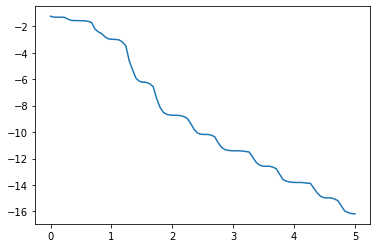

In [15]:
nbEpoch = 5 #Number of epochs

#Training of the model
err=[]
for _e in range(nbEpoch):
    err += DMRG.train(data,y) 

#Display the evolution of the error
sweeps=np.linspace(0,nbEpoch,len(err))
plt.plot(sweeps,np.log(err))
plt.show()

## Evaluation of the model

In [16]:
acc = DMRG.accuracy(data,y) #Computation of the accuray

print("Accuracy : ",acc*100,"%.")

Accuracy :  100.0 %.


## Make prediction

In [17]:
new_label = DMRG.predict(data) #Computation of the value of the decision function the inputs of data